# Sequential-Decision-Making-in-Pendulum-Dynamics-with-LQR-Control

### Starting from x = [+0.1; 0.0], simulate the pendulum dynamics for T = 499 steps with u[t] = 0. Plot on the same figure the angle, the angular velocity as a function of time. Add the legend.

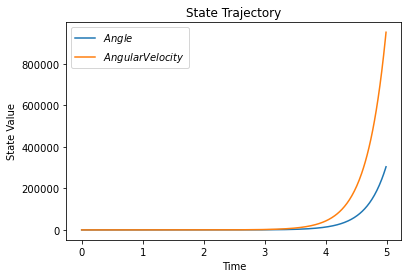

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the matrix exponential and integral functions
def expo(A, t):
    λ, V = np.linalg.eig(A)
    return V @ np.diag(np.exp(λ * t)) @ np.linalg.inv(V)


# Define the state transition function
def f(A, B, x, u):
    return np.dot(A, x) + np.dot(B, u)

# Constants and matrices
g, L, dt, T = 9.8, 1, 0.01, 500
VF = np.array([[0, 1], [g / L, 0]])
Q = 1e-3 * np.eye(2)
R = 1e-1 * np.eye(1)
u = np.zeros((1, T))

A = expo(VF, dt)
B = np.array([0.01, 0.0005]).reshape(-1, 1)


# Initialize the cost-to-go matrix
V = [Q]
for t in range(2, T + 1):
    
    V_t = A.T @ V[-1] @ A + Q - A.T @ V[-1] @ B @ np.linalg.inv(B.T @ V[-1] @ B + R) @ B.T @ V[-1] @ A
    V.append(V_t)
V = V[::-1]  # Reverse the list

x = np.empty((2, T))

# Define the initial state
x[:, 0] = np.array([0.1, 0.0])
for t in range(1, T):
    #print(t)
    x[:, t] = f(A, B, x[:, t - 1], u[:, t - 1])

# Create time vector
t_vec = np.arange(0, T * dt, dt)

# Plot the state trajectory
plt.plot(t_vec, x[0, :], label=r"$Angle$")
plt.plot(t_vec, x[1, :], label=r"$Angular Velocity$")
plt.xlabel("Time")
plt.ylabel("State Value")
plt.title("State Trajectory")
plt.legend()
plt.show()


Starting from 
x[0]=[0.1,0.0]:

Angle (θ) Observation: The initial angle is slightly above the vertical, and it gradually increases over time, indicating that the pendulum swings away from the top position.

Angular Velocity (θ) Observation: The initial angular velocity is zero and remains zero. The pendulum gains momentum as it swings away from the vertical position.

## Starting from x = [-0.1; 0.0], simulate the pendulum dynamics for T = 499 steps with u[t] = 0. plot on the same figure the angle, the angular velocity as a function of time. Add the legend.

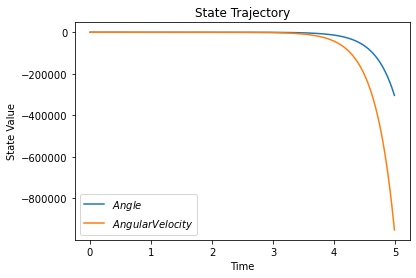

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Define the matrix exponential and integral functions
def expo(A, t):
    λ, V = np.linalg.eig(A)
    return V @ np.diag(np.exp(λ * t)) @ np.linalg.inv(V)


# Define the state transition function
def f(A, B, x, u):
    return np.dot(A, x) + np.dot(B, u)

# Constants and matrices
g, L, dt, T = 9.8, 1, 0.01, 500
VF = np.array([[0, 1], [g / L, 0]])
Q = 1e-3 * np.eye(2)
R = 1e-1 * np.eye(1)
u = np.zeros((1, T))

A = expo(VF, dt)
B = np.array([0.01, 0.0005]).reshape(-1, 1)


# Initialize the cost-to-go matrix
V = [Q]
for t in range(2, T + 1):
    
    V_t = A.T @ V[-1] @ A + Q - A.T @ V[-1] @ B @ np.linalg.inv(B.T @ V[-1] @ B + R) @ B.T @ V[-1] @ A
    V.append(V_t)
V = V[::-1]  # Reverse the list

x = np.empty((2, T))

# Define the initial state
x[:, 0] = np.array([-0.1, 0.0])
for t in range(1, T):
    #print(t)
    
    x[:, t] = f(A, B, x[:, t - 1], u[:, t - 1])

# Create time vector
t_vec = np.arange(0, T * dt, dt)

# Plot the state trajectory
plt.plot(t_vec, x[0, :], label=r"$Angle$")
plt.plot(t_vec, x[1, :], label=r"$Angular Velocity$")
plt.xlabel("Time")
plt.ylabel("State Value")
plt.title("State Trajectory")
plt.legend()
plt.show()


Starting from 
x[0]=[−0.1,0.0]:

Angle (θ) Observation: The initial angle is slightly below the vertical, and it gradually decreases over time, indicating that the pendulum swings away from the top position in the opposite direction.

Angular Velocity (θ) Observation: The initial angular velocity is zero and remains zero. The pendulum gains momentum in the opposite direction as it swings.

## Repeat 1-4 with the optimal state-feedback control signal, ulqr [t] = K [t]x[t], with R = 0.1, and with three different values for α ∈ [0.001, your value, your value] in Q = α ∗ IdentityMatrix2×2. You can use the same matrix Q for Qf. x = (+1,0)

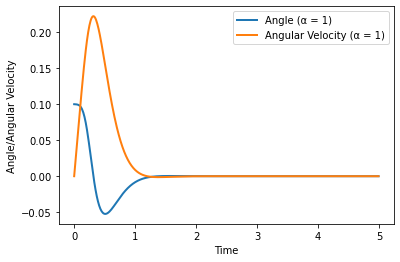

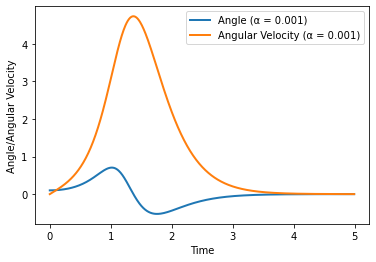

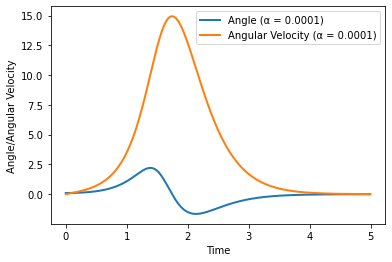

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# Define matrix exponential and integral functions
def expm(A, t):
    eigenvalues, eigenvectors = np.linalg.eig(A)
    return eigenvectors @ np.diag(np.exp(eigenvalues * t)) @ np.linalg.inv(eigenvectors)

# Define system dynamics function
def f(A, B, x, u):
    return np.dot(A, x) + np.dot(B, u)

# System parameters
g, L, dt, T = 9.8, 1, 0.01, 500
VF = np.array([[0, 1], [g / L, 0]])
R = 0.1 * np.eye(1)  # Control effort cost matrix

# Define the range of α values to test
alpha_values = [1, 0.001, 0.0001]

# Initialize an array to store the simulation results for each α
results = []

for alpha in alpha_values:
    Q = alpha * np.eye(2)

    # Calculate A and B matrices
    A = np.real(expm(VF, dt))
    B = np.array([0.01, 0.0005]).reshape(-1, 1)
    # Initialize state covariance matrix V with Q
    V = [Q]

    # Initialize state trajectory array x
    x = np.empty((2, T))
    x[:, 0] = np.array([+0.1, 0.0])

    # Initialize control input array ulqr
    ulqr = np.zeros((1, T))

    for t in range(T - 1):
        # Calculate control input ulqr[t] based on the current state x[:, t] and K
        K = -np.linalg.inv(B.T @ V[-1] @ B + R) @ B.T @ V[-1] @ A
        ulqr[:,t] = np.dot(K, x[:, t])

        # Update the state for the next time step
        x[:, t + 1] = f(A, B, x[:, t], ulqr[:,t])

        # Update the state covariance matrix V
        V_t = A.T @ V[-1] @ A + Q - A.T @ V[-1] @ B @ np.linalg.inv(B.T @ V[-1] @ B + R) @ B.T @ V[-1] @ A
        V.append(V_t)

    # Store the simulation results for this α
    results.append((x, ulqr))

# Plot the simulation results for each α
for i, alpha in enumerate(alpha_values):
    x, ulqr = results[i]
    time = np.arange(0, T * dt, dt)

    plt.plot(time, x[0, :], label=f"Angle (α = {alpha})", linewidth=2)
    plt.plot(time, x[1, :], label=f"Angular Velocity (α = {alpha})", linewidth=2)

    plt.xlabel("Time")
    plt.ylabel("Angle/Angular Velocity")
    plt.legend()
    plt.show()


Here the angular velocity goes upwards then it slowly goes to equilibirium and the angle it tries to reach to equilbirun state but it kind of shoots up then down

## Repeat above with the optimal state-feedback control signal, ulqr [t] = K [t]x[t], with R = 0.1, and with three different values for α ∈ [0.001, your value, your value] in Q = α ∗ IdentityMatrix2×2. You can use the same matrix Q for Qf. x = (-1,0)

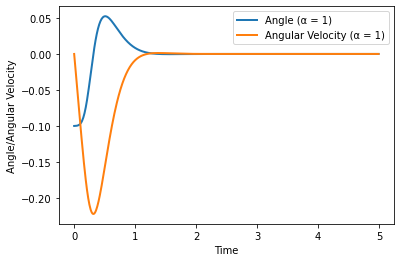

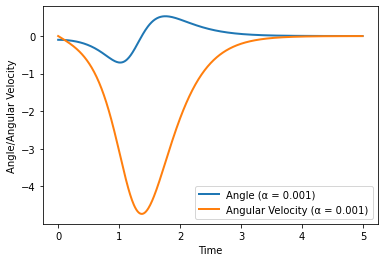

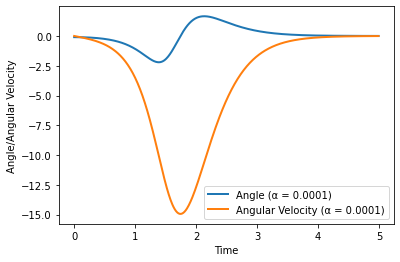

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Define matrix exponential and integral functions
def expm(A, t):
    eigenvalues, eigenvectors = np.linalg.eig(A)
    return eigenvectors @ np.diag(np.exp(eigenvalues * t)) @ np.linalg.inv(eigenvectors)

# Define system dynamics function
def f(A, B, x, u):
    return np.dot(A, x) + np.dot(B, u)

# System parameters
g, L, dt, T = 9.8, 1, 0.01, 500
VF = np.array([[0, 1], [g / L, 0]])
R = 0.1 * np.eye(1)  # Control effort cost matrix

# Define the range of α values to test
alpha_values = [1, 0.001, 0.0001]

# Initialize an array to store the simulation results for each α
results = []

for alpha in alpha_values:
    Q = alpha * np.eye(2)

    # Calculate A and B matrices
    A = np.real(expm(VF, dt))
    B = np.array([0.01, 0.0005]).reshape(-1, 1)
    # Initialize state covariance matrix V with Q
    V = [Q]

    # Initialize state trajectory array x
    x = np.empty((2, T))
    x[:, 0] = np.array([-0.1, 0.0])

    # Initialize control input array ulqr
    ulqr = np.zeros((1, T))

    for t in range(T - 1):
        # Calculate control input ulqr[t] based on the current state x[:, t] and K
        K = -np.linalg.inv(B.T @ V[-1] @ B + R) @ B.T @ V[-1] @ A
        ulqr[:,t] = np.dot(K, x[:, t])

        # Update the state for the next time step
        x[:, t + 1] = f(A, B, x[:, t], ulqr[:,t])

        # Update the state covariance matrix V
        V_t = A.T @ V[-1] @ A + Q - A.T @ V[-1] @ B @ np.linalg.inv(B.T @ V[-1] @ B + R) @ B.T @ V[-1] @ A
        V.append(V_t)

    # Store the simulation results for this α
    results.append((x, ulqr))

# Plot the simulation results for each α
for i, alpha in enumerate(alpha_values):
    x, ulqr = results[i]
    time = np.arange(0, T * dt, dt)

    plt.plot(time, x[0, :], label=f"Angle (α = {alpha})", linewidth=2)
    plt.plot(time, x[1, :], label=f"Angular Velocity (α = {alpha})", linewidth=2)

    plt.xlabel("Time")
    plt.ylabel("Angle/Angular Velocity")
    plt.legend()
    plt.show()


Here the angular velocity goes downwards then it slowly goes to equilibirium and the angle it tries to reach to equilbirun state but it kind of shoots down then up.

## Visualize the value function, V (x) = x′P0x, on a plot with the axes: θ = −0.3 : 0.001 : 0.3 and θ = −0.3 : 0.001 : 0.3. Explain your observation and the shape of V .


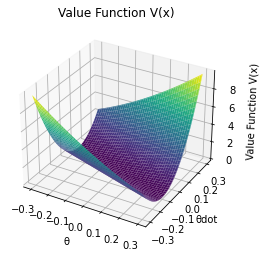

In [84]:

import numpy as np
import matplotlib.pyplot as plt

# Define matrix exponential and integral functions
def expm(A, t):
    eigenvalues, eigenvectors = np.linalg.eig(A)
    return eigenvectors @ np.diag(np.exp(eigenvalues * t)) @ np.linalg.inv(eigenvectors)

# Define system dynamics function
def f(A, B, x, u):
    return np.dot(A, x) + np.dot(B, u)

# System parameters
g, L, dt, T = 9.8, 1, 0.01, 500
VF = np.array([[0, 1], [g / L, 0]])
R = 0.1 * np.eye(1)  # Control effort cost matrix

# Define the range of α values to test
alpha_values = [1, 0.001, 0.0001]

# Initialize an array to store the simulation results for each α
results = []

for alpha in alpha_values:
    Q = alpha * np.eye(2)

    # Calculate A and B matrices
    A = np.real(expm(VF, dt))
    B = np.array([0.01, 0.0005]).reshape(-1, 1)

    # Initialize state covariance matrix V with Q
    V = [Q]

    # Initialize state trajectory array x
    x = np.empty((2, T))
    x[:, 0] = np.array([-0.1, 0.0])

    # Initialize control input array ulqr
    ulqr = np.zeros((1, T))

    for t in range(T - 1):
        # Calculate control input ulqr[t] based on the current state x[:, t] and K
        K = -np.linalg.inv(B.T @ V[-1] @ B + R) @ B.T @ V[-1] @ A
        ulqr[:, t] = np.dot(K, x[:, t])

        # Update the state for the next time step
        x[:, t + 1] = f(A, B, x[:, t], ulqr[:, t])

        # Update the state covariance matrix V
        V_t = A.T @ V[-1] @ A + Q - A.T @ V[-1] @ B @ np.linalg.inv(B.T @ V[-1] @ B + R) @ B.T @ V[-1] @ A
        V.append(V_t)

    # Store the simulation results for this α
    results.append((x, ulqr))

# Visualize the value function V(x) = x'P0x on a 3D surface plot
theta_range = np.arange(-0.3, 0.301, 0.001)
theta_dot_range = np.arange(-0.3, 0.301, 0.001)
V_values = np.zeros((len(theta_range), len(theta_dot_range)))

for i, theta in enumerate(theta_range):
    for j, theta_dot in enumerate(theta_dot_range):
        x = np.array([theta, theta_dot])
        V_values[i, j] = x.T @ V[-1] @ x

theta_grid, theta_dot_grid = np.meshgrid(theta_range, theta_dot_range)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta_grid, theta_dot_grid, V_values, cmap='viridis')

ax.set_xlabel('θ')
ax.set_ylabel('θdot')
ax.set_zlabel('Value Function V(x)')
ax.set_title('Value Function V(x)')
plt.show()


1. **Symmetry**: The U-shaped graph typically exhibits symmetry along the (theta) and (dot{theta}) axes. This symmetry suggests that the value function has similar values for corresponding positive and negative values of (theta) and (dot{theta}). This is a result of the system's symmetry and the fact that the value function considers the quadratic relationship between states.

2. **Minimum at the Bottom of the U**: The lowest point within the U-shaped graph represents the minimum value of the value function V(x). This point corresponds to the optimal state or states that the control policy aims to reach. In control theory, minimizing the value function typically leads to optimal control actions that stabilize the system.

3. **Optimal Trajectories**: Trajectories that follow the U-shaped curve downward are likely to represent optimal control strategies. These trajectories correspond to the states and control inputs that minimize the cost associated with the control problem.

4. **Influence of System Parameters**: The specific shape and size of the U-shaped curve can be influenced by system parameters, such as the mass, length, and damping of the pendulum, as well as the choice of the cost function \(Q\) and \(R\) in the control problem. Changing these parameters can alter the shape of the value function.
